<a href="https://colab.research.google.com/github/akshita2k/Neural_networks/blob/master/XOR_Gates_by_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
input_data=np.array([[0,0,0],
                    [0,1,0],
                    [0,0,1],
                    [1,1,0],
                    [1,0,1],
                    [1,1,1]])

In [0]:
output_data=np.array([[0],
                      [0],
                      [0],
                      [0],
                      [0],
                      [1]])

In [0]:
def sigmoid(x):
  return (1)/(1+ np.exp(-x))

In [0]:
def dsigmoid(x):
  return x*(1-x)

In [0]:
np.random.seed(1)
w0=np.random.random((3,2))-1
w1=np.random.random((2,1))-1

b0=np.random.random((1,1))-1
b1=np.random.random((1,1))-1

In [0]:
def feed_forward(data_in,wo,w1,b0,b1):
  layer0=data_in
  layer1=sigmoid(np.dot(layer0,w0)+b0)
  layer2=sigmoid(np.dot(layer1,w1)+b1)

  return layer0,layer1,layer2

In [0]:
def back_propogation(layer0,layer1,layer2,actual_y,w0,w1,b0,b1,learning_rate,i):
    
    l2_error = layer2 - actual_y
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    
    b1=b1 - (learning_rate * np.mean(l2_delta))
    b0=b0 - (learning_rate * np.mean(l1_delta))
    
    if i%1 ==0 and (i!=0):
        loss=np.mean(np.power(layer2 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%100==0:
            print('\n',int(i),loss)
    return w0,w1,b1,b0

In [0]:
def accuracy(testx,testy):
  correct=0
  layer0,layer1,layer2=feed_forward(testx,w0,w1,b0,b1)

  for i in range (len(testx)):
    if np.argmax(layer2[i])==np.argmax(testy[1]):
      correct+=1
  return f"Accuracy:{correct*100/len(testy)}"
  

In [0]:
epochs=10
loss_curve =[]
iters=[]

In [0]:
for i in range (epochs):
  layer0,layer1,layer2=feed_forward(input_data,w0,w1,b0,b1)
  w0,w1,b0,b1=back_propogation(layer0,layer1,layer2,output_data,w0,w1,b0,b1,0.01,i)

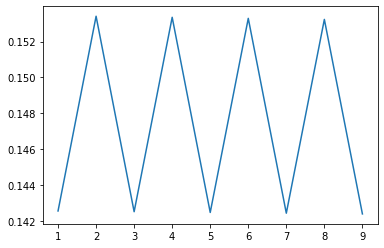

In [0]:
plt.plot(iters,loss_curve)


In [0]:
accuracy(input_data,output_data)

'Accuracy:100.0'

In [0]:
feed_forward([1,1,0],w0,w1,b0,b1)

([1, 1, 0], array([[0.1010474 , 0.17076165]]), array([[0.34116532]]))